In [1]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import math
from IPython.display import display

In [2]:
def ro(x):
    return (np.pi)**(-0.5)*np.exp(-x**2)
N = 1e7
X = np.zeros((int(N),4)); 
A1 = np.zeros([int(N)])
A2 = np.zeros([int(N)])
A3 = np.zeros([int(N)])
A4 = np.zeros([int(N)])

xwi=0;
np.random.seed(0)
for i in range(2,int(N)):
    dx = 0.5*(np.random.random()-0.5)
    xw2i = xwi + dx
    y = np.random.random()
    if y < (ro(xw2i)/ro(xwi)):
        xwi = xw2i
    for j in range(0,4):  
        X[i,j] = xwi**(j+1)
    A1[i] = A1[i-1] + X[i,0]
    A2[i] = A2[i-1] + X[i,1]
    A3[i] = A3[i-1] + X[i,2]
    A4[i] = A4[i-1] + X[i,3]

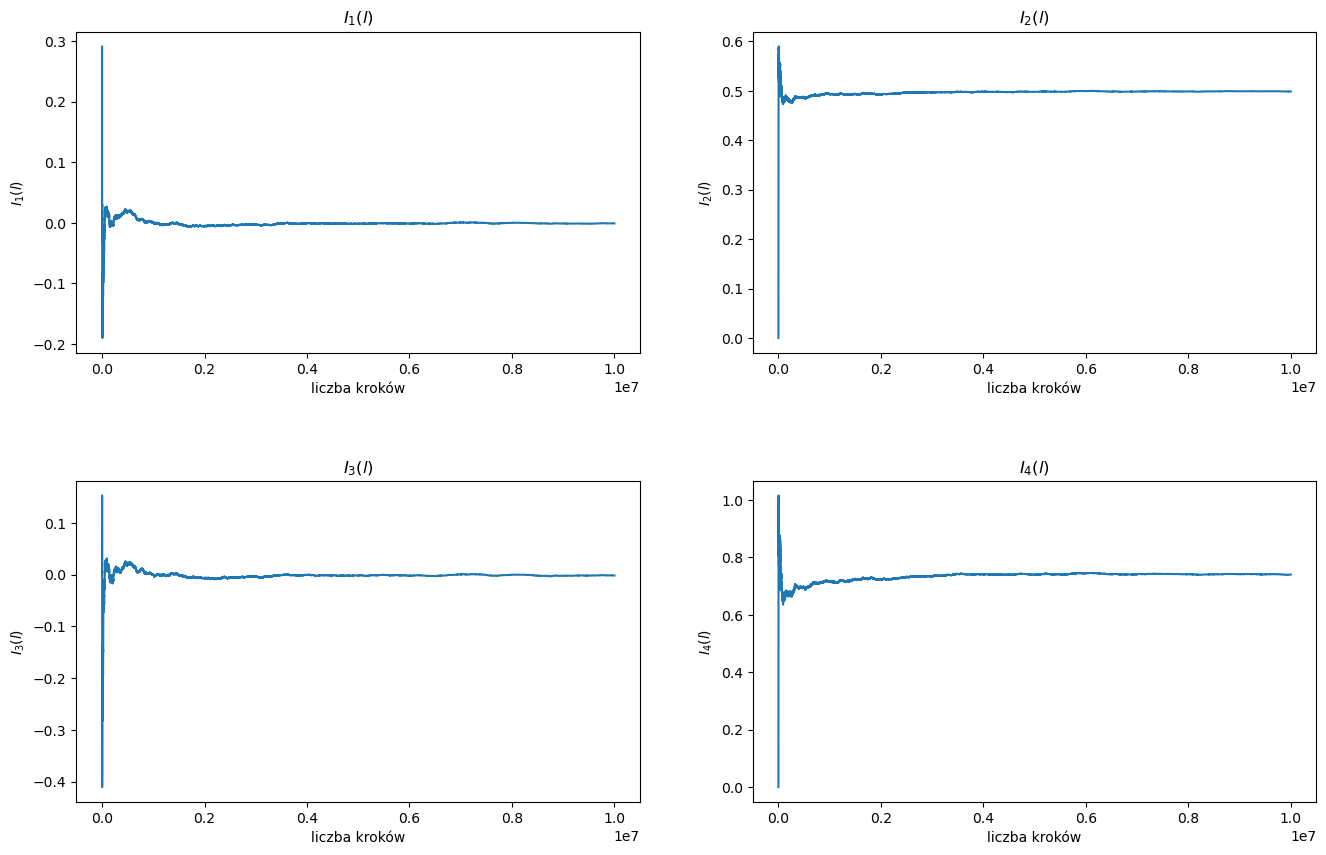

In [3]:
l = np.linspace(1, int(N), num = int(N))
fig = plt.figure(figsize=(16, 10))

plt.subplot(2,2,1)
plt.title(r'$I_1(l)$')
plt.xlabel('liczba kroków')
plt.ylabel(r'$I_1(l)$')
plt.plot(l,A1/l)

plt.subplot(2,2,2)
plt.title(r'$I_2(l)$')
plt.xlabel('liczba kroków')
plt.ylabel(r'$I_2(l)$')
plt.plot(l,A2/l)

plt.subplot(2,2,3)
plt.title(r'$I_3(l)$')
plt.xlabel('liczba kroków')
plt.ylabel(r'$I_3(l)$')
plt.plot(l,A3/l)

plt.subplot(2,2,4)
plt.title(r'$I_4(l)$')
plt.xlabel('liczba kroków')
plt.ylabel(r'$I_4(l)$')
plt.plot(l,A4/l)

plt.subplots_adjust(hspace=0.4)
plt.show()

In [4]:
#Z dobrym przybliżeniem jest to średnia wartość co widać po wykresach
print(round(A1[int(N)-1]/N,5))
print(round(A2[int(N)-1]/N,5))
print(round(A3[int(N)-1]/N,5))
print(round(A4[int(N)-1]/N,5))

-0.0009
0.49862
-0.00184
0.7399


In [5]:
def Psi(x,y):
    return (np.pi)**(-0.5)*np.exp(-(x**2+y**2)/2)
def ro_2d(x, y):
    return abs(Psi(x, y)**2)

In [9]:
N = 300
Xi = np.zeros((int(N))); 
Yi = np.zeros((int(N))); 

xwi=0;
ywi=0;
np.random.seed(0)
for i in range(1,int(N)):
    dx = 0.5*(np.random.random()-0.5)
    xw2i = xwi + dx
    dy = 0.5*(np.random.random()-0.5)
    yw2i = ywi + dy
    y = np.random.random()
    if y < (ro_2d(xw2i,ywi)/ro_2d(xwi,ywi)):
        xwi = xw2i
    if y < (ro_2d(xwi,yw2i)/ro_2d(xwi,ywi)):
        ywi = yw2i
    Xi[i] = xwi;
    Yi[i] = ywi;

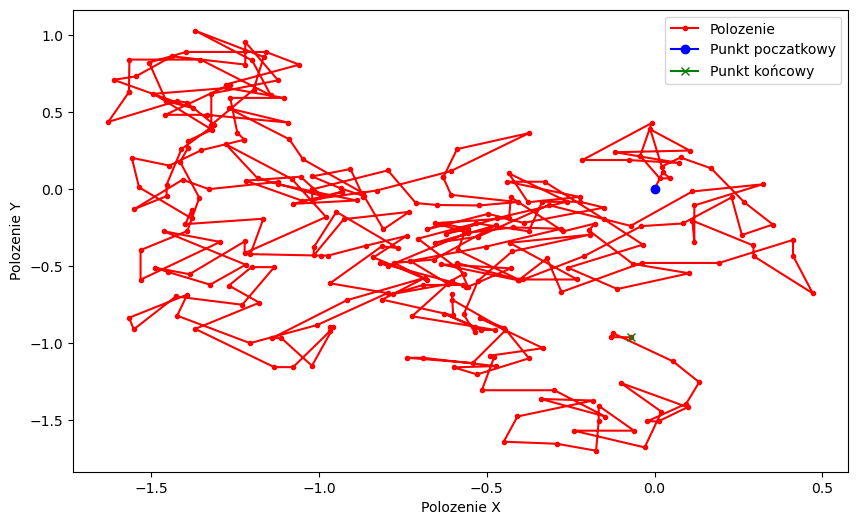

Położenie końcowe ma współrzędne: [-0.070099, -0.961883]


In [10]:
plt.figure(figsize=(10, 6))

plt.plot(Xi, Yi, label='Polozenie', marker='.', color='red')
plt.plot(Xi[0],Yi[0],label='Punkt poczatkowy', marker='o', color='blue')
plt.plot(Xi[N-1],Yi[N-1],label='Punkt końcowy', marker='x', color='green')
plt.xlabel('Polozenie X')
plt.ylabel('Polozenie Y')
plt.legend(loc='upper right')
plt.show()
print('Położenie końcowe ma współrzędne:', [round(Xi[N-1], 6), round(Yi[N-1], 6)])

In [18]:
N = 5*1e6
Xi = np.zeros((int(N))); 
Yi = np.zeros((int(N))); 
Ep = np.zeros([int(N)])

xwi=0;
ywi=0;
np.random.seed(0)
for i in range(1,int(N)):
    dx = 0.5*(np.random.random()-0.5)
    xw2i = xwi + dx
    dy = 0.5*(np.random.random()-0.5)
    yw2i = ywi + dy
    y = np.random.random()
    if y < (ro_2d(xw2i,ywi)/ro_2d(xwi,ywi)):
        xwi = xw2i
    if y < (ro_2d(xwi,yw2i)/ro_2d(xwi,ywi)):
        ywi = yw2i
    Xi[i] = xwi;
    Yi[i] = ywi;
    Ep[i] = (xwi**2 + ywi**2)/2
EP = sum(Ep)/N;
EPi = np.zeros(int(N))+EP
Ni = np.linspace(1, int(N), int(N))

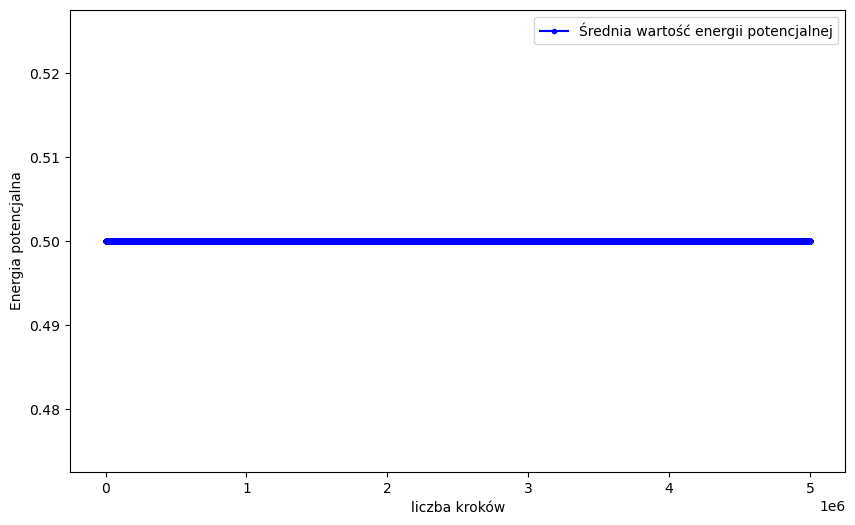

Dla N =  5000000  średnia wartość energii potencjalnej wynosi: 0.50009
Dokładna wartość średniej energii potencjalnej wynosi: 0.5


In [21]:
plt.figure(figsize=(10, 6))

plt.plot(Ni,EPi, label='Średnia wartość energii potencjalnej', marker='.', color='blue')
#plt.plot(Ni,Ep ,label='Wartość energii potencjalnej', marker='.', color='red')
plt.xlabel('liczba kroków')
plt.ylabel('Energia potencjalna')
plt.legend(loc='upper right')
plt.show()
print('Dla N = ',round(N),' średnia wartość energii potencjalnej wynosi:', round(EP,5))
print('Dokładna wartość średniej energii potencjalnej wynosi: 0.5')